# Digitale Darstellung von Farben und Bildern und wie man sie Manipuliert

## Einleitung

In diesem Notebook werden wir uns mit der digitalen Darstellung von Farben und Bildern beschäftigen. Wir werden uns mit den Grundlagen der digitalen Farbdarstellung und der Manipulation von Bildern befassen. Wir verwenden die Programmiersprache Python und einige ihrer Bibliotheken, um die Konzepte zu demonstrieren und mit ihnen zu experimentieren.

## Grundlagen

### Farben

Farben können auf verschiedene Arten dargestellt werden. Eine der gebräuchlichsten Methoden ist die Verwendung eines [RGB-Farbraums wie sRGB](https://en.wikipedia.org/wiki/SRGB). In diesem Farbraum wird jede Farbe durch eine Kombination von Rot, Grün und Blau dargestellt. Jede dieser Farben kann einen Intensitätswert zwischen 0 % und 100 % (bei 8 bit: 0-255) annehmen. Die Kombination dieser drei Farben in verschiedenen Verhältnissen ermöglicht die Darstellung einer Vielzahl von Farben.  
In Python können wir Farben im sRGB-Farbraum mit Hilfe von Tupeln darstellen. Jede Farbe wird durch ein Tupel dargestellt, das aus drei Werten besteht, die die Intensität von Rot, Grün und Blau darstellen. Zum Beispiel wird die Farbe Rot durch das Tupel (255, 0, 0) dargestellt, während die Farbe Grün durch das Tupel (0, 255, 0) dargestellt wird.

### Bilder im Computer

Bilder setzen sich aus einer Sammlung von Pixeln zusammen, die jeweils eine Farbe darstellen. In einem RGB-Bild besteht jedes Pixel aus drei Werten, die die Intensität von Rot, Grün und Blau darstellen. In Python können wir Bilder als 3D-Arrays (Stellen Sie sich eine dreidimensionale Tabelle vor) darstellen, wobei die ersten beiden Dimensionen die Höhe (y in negativrichtung) und Breite des Bildes darstellen und die dritte Dimension die Intensität von Rot, Grün und Blau, also `image[y, x, Farbkanal]`. Zum Beispiel kann ein 100x100 Pixel großes Bild als ein 3D-Array der Form (100, 100, 3) dargestellt werden.   
Um ein beliebiges Pixel in diesem Bild zu adressieren, können wir die Koordinaten des Pixels und die Farbkanäle verwenden. Zum Beispiel würde das Pixel in der oberen linken Ecke des Bildes die Koordinaten (0, 0) haben und die drei Farben des Pixels könnten durch das Array `image[0, 0]` abgerufen werden. Alternativ kann auch gleichzeitig auf die Farben zugegriffen werden, indem die Koordinaten und der Farbkanal angegeben werden, z.B. `image[0, 0, 0]` für den roten Kanal, `image[0, 0, 1]` für den grünen Kanal und `image[0, 0, 2]` für den blauen Kanal.



In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting
from skimage import io, data, color, img_as_float

In [32]:
# Load a sample color image
image = data.astronaut()
# Convert the image to grayscale
gray_image = color.rgb2gray(image)

<Figure size 1200x400 with 0 Axes>

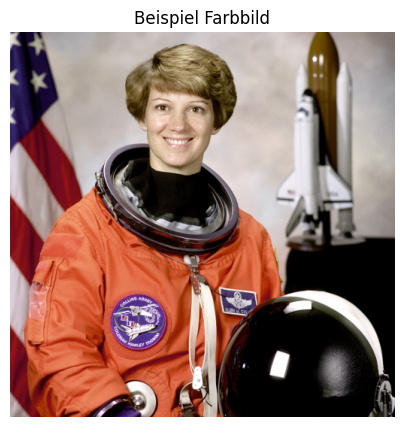

<Figure size 1200x400 with 0 Axes>

In [33]:

plt.figure(figsize=(8, 5))
plt.imshow(image)
plt.title("Beispiel Farbbild")
plt.axis('off')
# Create a figure for the color channel plots

plt.figure(figsize=(12, 4))

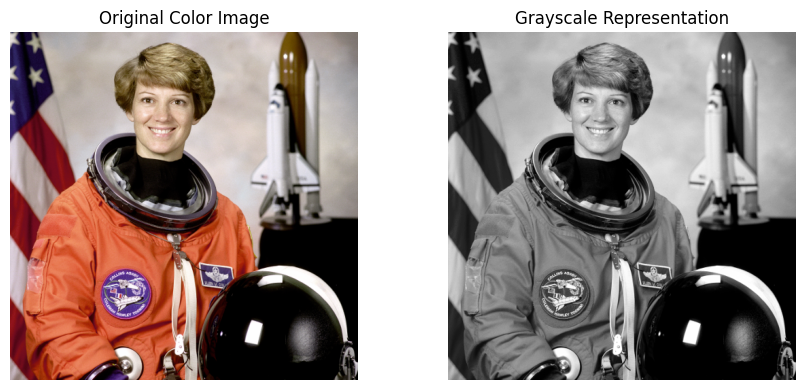

In [34]:

gray_image = color.rgb2gray(image)
# Creating side-by-side subplots for the color image and its grayscale version
plt.figure(figsize=(9, 4))
# Plotting the original color image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Color Image")
plt.axis('off')

# Plotting the grayscale representation
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Intensität als Graustufen (Grayscale)")
plt.axis('off')
plt.tight_layout()
plt.show()


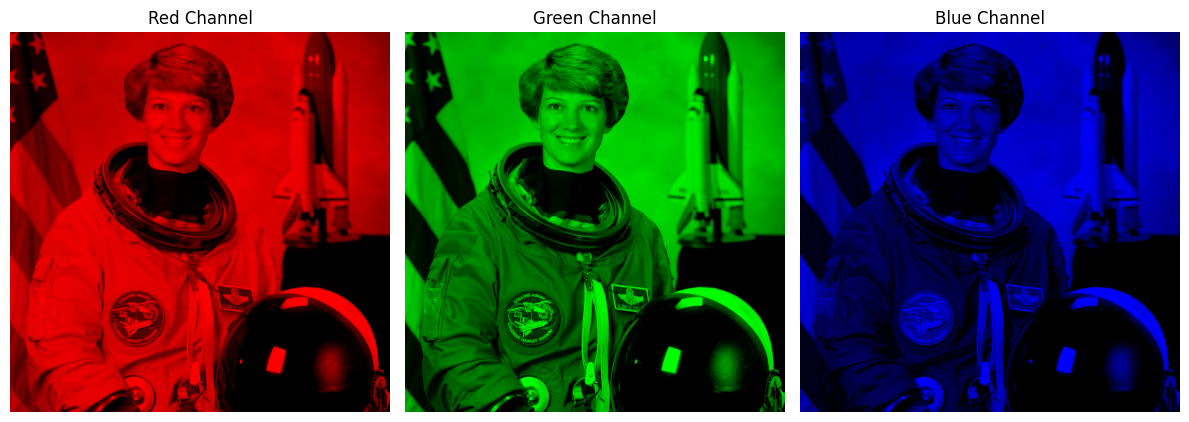

In [35]:
colors = ['Red', 'Green', 'Blue']
plt.figure(figsize=(12, 5))
for i, color in enumerate(colors, start=1):
    channel_image = np.zeros(image.shape, dtype="uint8")
    channel_image[:,:,i-1] = image[:,:,i-1]
    plt.subplot(1, 3, i)
    plt.imshow(channel_image)
    plt.title(f"{color} Channel")
    plt.axis('off')

plt.tight_layout()
plt.show()

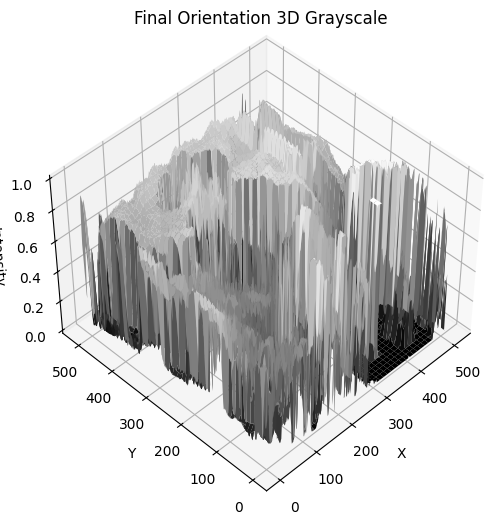

In [36]:
# Performing one last flip along the X-axis to achieve the desired orientation based on the latest instruction.
plt.figure(figsize=(8, 6))

Z = gray_image 
# prepare the meshgrid
x = np.arange(image.shape[1])
y = np.arange(image.shape[0])
X, Y = np.meshgrid(x, y)

# Perform the necessary flips for correct orientation
Z_flipped = np.flipud(np.fliplr(gray_image))  # First flip to match the orientation
Z_corrected = np.flipud(Z_flipped)  # Flip vertically based on the initial correction
Z_final = np.fliplr(Z_corrected)  # Flip horizontally for the correct orientation
Z_final_x_flip = np.flipud(Z_final)  # Final flip along the X-axis for the desired view


# Plot the surface with the image correctly oriented after all adjustments
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z_final_x_flip, cmap='gray', edgecolor='none')
ax.set_title("Final Orientation 3D Grayscale")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.view_init(45, 225)  # Adjusting the viewing angle to match the final orientation correctly

plt.show()


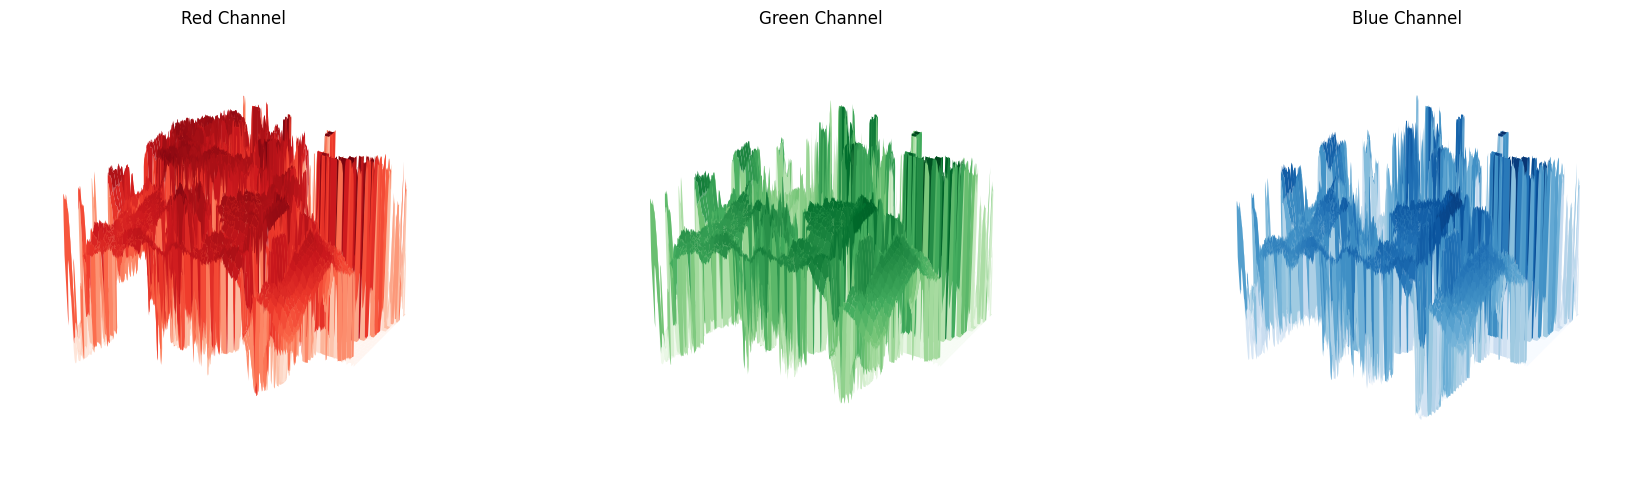

In [37]:
# 3. Plotting each color channel in a 1x3 subplot
# Adjusting the 3D plot section for correct execution

# Plotting each color channel in a 3D plot
fig = plt.figure(figsize=(18, 5))
colors = ['Red', 'Green', 'Blue']
cmaps = ['Reds', 'Greens', 'Blues']

for i, (color, cmap) in enumerate(zip(colors, cmaps), start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    
    # Extracting the specific color channel and using it as Z values for height
    Z = image[:, :, i-1] / 255.0  # Normalize the values to [0, 1] for consistent plotting
    
    # Plotting the surface
    ax.plot_surface(X, Y, Z, cmap=cmap, edgecolor='none')
    
    ax.set_title(f"{color} Channel")
    ax.axis('off')

plt.tight_layout()
plt.show()

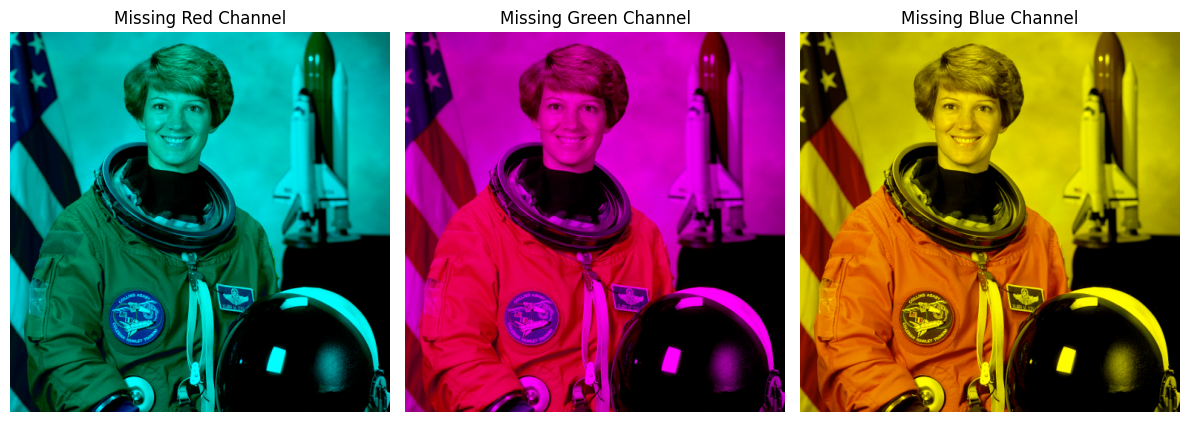

In [38]:
# Creating a 1-by-3 subplot where each subplot is missing one of the color channels (R, G, B)

plt.figure(figsize=(12, 5))
titles = ['Missing Red Channel', 'Missing Green Channel', 'Missing Blue Channel']

# Loop through each channel to zero it out and create a subplot
for i in range(3):
    modified_image = image.copy()
    modified_image[:, :, i] = 0  # Zero out the i-th channel
    plt.subplot(1, 3, i+1)
    plt.imshow(modified_image)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


## Farbkanäle Manipulieren

Um einen gewünschten Effekt zu erzeugen, können wir die Farbkanäle eines Bildes manipulieren. Zum Beispiel können wir die Farbkanäle eines Bildes vertauschen, um so ein neues Bild zu erzeugen.



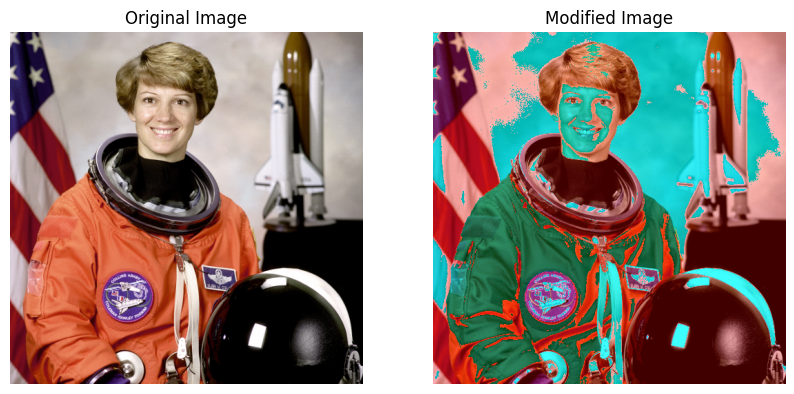

In [59]:
def apply_filter_to_channel(image, channel, filter_function):
    """
    Applies a user-defined filter function to a specific channel of an image.

    Parameters:
    - image: A 3D numpy array representing the RGB image.
    - channel: An integer representing the channel index (0 for Red, 1 for Green, 2 for Blue).
    - filter_function: A function that takes a 2D numpy array and returns a modified 2D numpy array.

    Returns:
    - modified_image: A 3D numpy array representing the modified RGB image.
    """
    # Ensure the input image is copied to avoid modifying the original image
    modified_image = image.copy()
    # Extract the specified channel
    channel_data = modified_image[:, :, channel]
    # Apply the filter function to the extracted channel
    modified_channel_data = filter_function(channel_data)
    # Ensure the modified channel data is within the valid range [0, 255]
    modified_channel_data = np.clip(modified_channel_data, 0, 255)
    # Update the image with the modified channel data
    modified_image[:, :, channel] = modified_channel_data.astype(np.uint8)

    return modified_image

# Example filter function that increases the intensity of the channel
def increase_intensity(channel_data, increase_value=30):
    return channel_data + increase_value


# Apply the example filter function to the Red channel of the image
modified_image = apply_filter_to_channel(image, 0, lambda x: increase_intensity(x, 64))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.show()

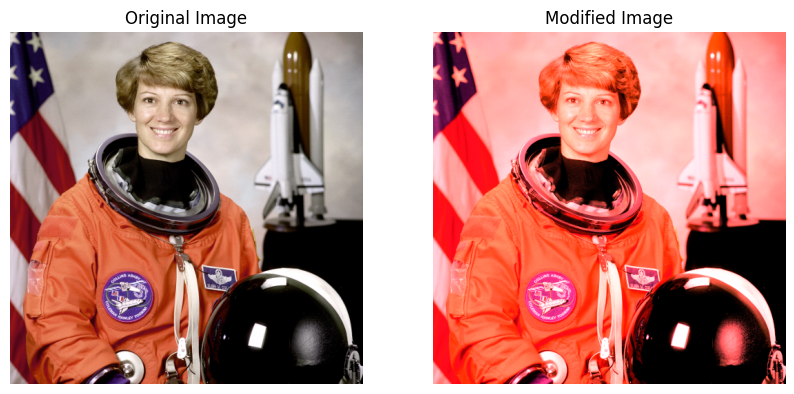

In [76]:
def apply_filter_to_channel_float(image, channel, filter_function):
    """
    Applies a user-defined filter function to a specific channel of a floating-point image.

    Parameters:
    - image: A 3D numpy array representing the RGB image in floating-point format.
    - channel: An integer representing the channel index (0 for Red, 1 for Green, 2 for Blue).
    - filter_function: A function that takes a 2D numpy array and returns a modified 2D numpy array.
                       This function should be designed to work with floating-point data.

    Returns:
    - modified_image: A 3D numpy array representing the modified RGB image in floating-point format.
    """
    # Ensure the input image is in floating-point format
    if image.dtype != np.float32 and image.dtype != np.float64:
        image = img_as_float(image)
    
    # Apply the filter function to the specified channel
    modified_channel = filter_function(image[:, :, channel])
    
    # Ensure the modified channel data is within the valid range [0, 1]
    modified_channel = np.clip(modified_channel, 0, 1)
    
    # Update the image with the modified channel data
    modified_image = image.copy()
    modified_image[:, :, channel] = modified_channel
    
    return modified_image


# function that increases the intensity of a channel by a certain percentage, ensuring no wrap-around
def increase_intensity_percentage(channel_data, increase_percentage):
    """
    Increases the intensity of a channel by a certain percentage, ensuring no wrap-around,
    with the data represented as float values in the range [0, 1].
    
    Parameters:
    - channel_data: A 2D numpy array representing the channel's pixel values.
    - increase_percentage: The percentage to increase each pixel's intensity by.
    
    Returns:
    - A 2D numpy array with the modified channel data.
    """
    # Convert the channel data to float values in the range [0, 1]
    float_channel_data = img_as_float(channel_data)
    
    # Calculate the increase based on the percentage
    increase_value = increase_percentage / 100.0
    
    # Apply the increase
    float_channel_data = float_channel_data * (1 + increase_value)

    
    # Ensure the values are within [0, 1] after the operation
    float_channel_data = np.clip(float_channel_data, 0, 1)
    
    return float_channel_data


# Apply the example filter function to the Red channel of the image
modified_image = apply_filter_to_channel_float(image, 0, lambda x: increase_intensity_percentage(x, 200))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.show()